In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("president_polls.csv")
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
11905,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
11906,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
11907,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


In [4]:
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

In [5]:
df = df[['question_id','poll_id','state', 'pollster','start_date','end_date','answer','pct']]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
4,133777,71435,Georgia,Emerson College,10/17/20,10/19/20,Biden,47.0
...,...,...,...,...,...,...,...,...
11904,92081,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,46.0
11905,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Warren,43.0
11906,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,49.0
11907,92078,57025,NaN,Rasmussen Reports/Pulse Opinion Research,11/12/18,11/13/18,Obama,50.0


In [6]:
print(len(df.pollster.unique()))

196


In [7]:
df.start_date.unique()

array(['10/18/20', '10/17/20', '10/15/20', '10/13/20', '10/6/20',
       '10/16/20', '10/14/20', '10/5/20', '9/21/20', '9/20/20',
       '10/12/20', '10/4/20', '9/19/20', '10/3/20', '9/18/20', '10/11/20',
       '10/9/20', '10/2/20', '9/17/20', '10/10/20', '10/7/20', '10/1/20',
       '9/16/20', '10/8/20', '9/30/20', '9/15/20', '9/29/20', '9/14/20',
       '9/28/20', '9/27/20', '9/26/20', '9/25/20', '9/22/20', '9/24/20',
       '9/23/20', '9/1/20', '9/13/20', '9/12/20', '9/10/20', '9/11/20',
       '9/9/20', '9/8/20', '9/7/20', '9/6/20', '9/5/20', '9/4/20',
       '9/3/20', '9/2/20', '8/31/20', '8/29/20', '8/30/20', '8/28/20',
       '8/27/20', '8/26/20', '8/25/20', '8/24/20', '8/23/20', '8/22/20',
       '8/21/20', '8/20/20', '8/19/20', '8/18/20', '8/1/20', '8/17/20',
       '8/16/20', '8/15/20', '8/14/20', '8/13/20', '8/12/20', '8/11/20',
       '8/9/20', '8/10/20', '8/8/20', '8/7/20', '8/6/20', '8/5/20',
       '8/4/20', '8/3/20', '8/2/20', '7/31/20', '7/30/20', '7/28/20',
       '7

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  11909 non-null  int64  
 1   poll_id      11909 non-null  int64  
 2   state        7363 non-null   object 
 3   pollster     11909 non-null  object 
 4   start_date   11909 non-null  object 
 5   end_date     11909 non-null  object 
 6   answer       11909 non-null  object 
 7   pct          11909 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 744.4+ KB


In [9]:
df['start_date'] = pd.to_datetime(df['end_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


C:\Users\DCL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DCL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.head(10)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0
5,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4
6,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Biden,48.1
7,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Trump,45.8
8,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Jorgensen,3.0
9,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Hawkins,0.9


In [11]:
#Cleaning and exploring our data

In [12]:
start_date = '2020-08-01'
end_date = '2020-11-02'

mask = (df['start_date'] >= start_date) & (df['end_date'] <= end_date)
mask

0         True
1         True
2         True
3         True
4         True
         ...  
11904    False
11905    False
11906    False
11907    False
11908    False
Length: 11909, dtype: bool

In [13]:
df = df.loc[mask]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5371,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0
5372,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Jorgensen,3.0
5373,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Hawkins,1.0
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,2020-08-01,Biden,51.0


In [14]:
df.answer.unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons'], dtype=object)

In [15]:
candidates = ['Trump', 'Biden']
df = df.loc[df['answer'].isin(candidates)]
df.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [16]:
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5369,132630,70851,NaN,SurveyMonkey,2020-08-01,2020-08-01,Trump,46.39
5370,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Biden,31.00
5371,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.00
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,2020-08-01,Biden,51.00


In [17]:
df.loc[df['poll_id'] == 71450]

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0


In [18]:
df = df[df['state'].notna()]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5363,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Trump,41.0
5370,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Biden,31.0
5371,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,2020-08-01,Biden,51.0


In [19]:
len(df.poll_id.unique())

1099

In [20]:
#changing data layout or preprocessing
df.index = np.arange(1, len(df) + 1)
df["join_index"] = df.index + 1
df["join_index"]

C:\Users\DCL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1          2
2          3
3          4
4          5
5          6
        ... 
3286    3287
3287    3288
3288    3289
3289    3290
3290    3291
Name: join_index, Length: 3290, dtype: int64

In [21]:
odd_rows = df[df.index % 2 == 1]

grouped = odd_rows.join(df, "join_index", rsuffix=" second")
grouped

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4,7
7,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,9
9,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,127192,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Biden,46.0,3282,127192,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Trump,44.0,3283
3283,127193,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Biden,49.0,3284,127193,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Trump,45.0,3285
3285,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Biden,52.0,3286,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Trump,41.0,3287
3287,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Biden,31.0,3288,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0,3289


In [22]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

In [23]:
grouped['state'] = grouped['state'].str.replace(r' CD-1', '')
grouped['state'] = grouped['state'].str.replace(r' CD-2', '')

In [24]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

In [25]:
states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

In [26]:
def getBiden(row):
    return row["pct"] if row["answer"] == "Biden" else row["pct second"]

def getTrump(row):
    return row["pct"] if row["answer"] == "Trump" else row["pct second"]
    
def getSeats(row):
    return states[row["state"]]

grouped["Biden"] = grouped.apply(getBiden, axis=1)
grouped["Trump"] = grouped.apply(getTrump, axis=1)
grouped["Seats"] = grouped.apply(getSeats, axis=1)

grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,...,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second,Biden,Trump,Seats
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0,2,133816,...,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,3,48.0,47.0,18
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0,4,133838,...,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,5,50.0,47.0,20
5,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0,6,133777,...,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4,7,47.0,48.4,16
7,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,8,133664,...,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,9,49.0,45.0,20
9,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,10,133666,...,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,11,49.0,45.0,20


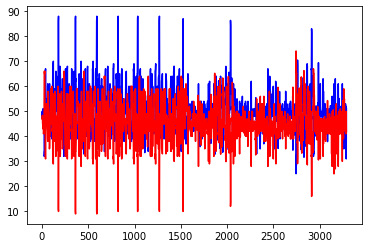

In [27]:
import matplotlib.pyplot as plt

plt.plot(grouped.index, grouped['Biden'], color="blue")
plt.plot(grouped.index, grouped['Trump'], color="red")

In [28]:
# Plotting the Difference
diff_by_date = grouped.groupby('start_date')['Biden', 'Trump'].mean().reset_index()
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']
diff_by_date

C:\Users\DCL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,start_date,Biden,Trump,difference
0,2020-08-01,41.000000,46.000000,-5.000000
1,2020-08-02,45.219375,47.030625,-1.811250
2,2020-08-03,47.600000,43.900000,3.700000
3,2020-08-04,49.428571,46.000000,3.428571
4,2020-08-05,47.200000,45.200000,2.000000
...,...,...,...,...
75,2020-10-15,51.770270,45.832432,5.937838
76,2020-10-16,51.921495,45.806542,6.114953
77,2020-10-17,52.047170,45.839623,6.207547
78,2020-10-18,52.025472,45.757547,6.267925
